<a href="https://colab.research.google.com/github/JankovitsA/FAKT_MI/blob/main/fakt_prog_e2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##2. alkalom
#Neurális hálózatok

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder #számmá alakít
from sklearn.model_selection import train_test_split #tanuló-tesztelő adatbázisok
from sklearn.preprocessing import StandardScaler #normalizálás

In [4]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
dataframe=pd.read_csv(file_url)

In [5]:
dataframe.shape

(303, 14)

In [16]:
dataframe.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0


In [9]:
dataframe.isna().sum() #nincs hiányzó adat

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#szöveg alapú változó számmá alakítása
labeler=LabelEncoder()

In [13]:
labeler.fit(dataframe.thal)

LabelEncoder()

In [15]:
dataframe.thal=labeler.transform(dataframe.thal)
# dataframe.thal = labeler.fit_transform(...)

In [17]:
y_df=dataframe.target

In [18]:
y_df.head()

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [40]:
x_df=dataframe.copy()
x_df=x_df.drop('target',axis=1) #oszloponként

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y_df,test_size=0.1,shuffle=True) #shuffle: összekeveri az értékeket

In [34]:
x_train.shape

(272, 13)

In [42]:
##Normalizálás #előbb kell kiszedni a testet
normalizer=StandardScaler()

In [43]:
normalizer.fit(x_train) #y-t nem kell, mert 0 v. 1

StandardScaler()

In [44]:
x_train=normalizer.transform(x_train)

In [45]:
x_train #innentől nem dataframe

array([[-0.05810945, -1.43393855, -0.08800253, ..., -0.90995604,
        -0.73861219, -0.46080789],
       [ 0.27818353,  0.69737995,  0.86946502, ...,  0.68687004,
         2.43353279,  1.12577118],
       [ 0.16608587,  0.69737995,  0.86946502, ...,  0.68687004,
         0.31876947, -0.46080789],
       ...,
       [-0.17020711,  0.69737995,  0.86946502, ..., -0.90995604,
        -0.73861219,  1.12577118],
       [ 0.39028119,  0.69737995,  0.86946502, ..., -0.90995604,
        -0.73861219,  1.12577118],
       [ 1.51125779, -1.43393855, -0.08800253, ...,  0.68687004,
        -0.73861219, -0.46080789]])

In [46]:
pd.DataFrame(x_train) #így már dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.058109,-1.433939,-0.088003,0.182814,1.084882,2.276361,-1.022530,0.860823,-0.691564,-0.896523,-0.909956,-0.738612,-0.460808
1,0.278184,0.697380,0.869465,1.853322,0.801924,2.276361,1.007603,-1.109292,-0.691564,-0.050981,0.686870,2.433533,1.125771
2,0.166086,0.697380,0.869465,-0.374022,0.047368,2.276361,1.007603,-0.252720,1.445998,0.118127,0.686870,0.318769,-0.460808
3,0.390281,-1.433939,0.869465,2.131740,-0.405366,2.276361,1.007603,-0.167063,1.445998,1.470994,0.686870,1.376151,-2.047387
4,1.287062,0.697380,0.869465,1.574904,-0.348774,-0.439298,1.007603,-0.509692,-0.691564,1.048223,-0.909956,-0.738612,-2.047387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,-0.506500,0.697380,0.869465,1.018068,-0.065816,-0.439298,1.007603,-0.937978,-0.691564,1.301885,0.686870,-0.738612,1.125771
268,-0.058109,0.697380,-0.088003,-0.652440,0.217143,-0.439298,1.007603,-0.124234,-0.691564,-0.558306,0.686870,-0.738612,1.125771
269,-0.170207,0.697380,0.869465,0.572599,-0.386502,-0.439298,1.007603,-1.666064,1.445998,-0.896523,-0.909956,-0.738612,1.125771
270,0.390281,0.697380,0.869465,1.018068,0.443510,-0.439298,1.007603,-1.666064,1.445998,-0.220090,-0.909956,-0.738612,1.125771


In [47]:
x_test=normalizer.transform(x_test) #a trainen már betanítottuk

In [48]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.058109,0.697380,-1.045470,-1.320643,1.179202,-0.439298,-1.022530,0.261223,-0.691564,-0.896523,-0.909956,-0.738612,1.125771
1,-0.282305,-1.433939,-0.088003,0.238498,-0.952419,-0.439298,1.007603,0.817995,-0.691564,-0.811969,0.686870,-0.738612,-0.460808
2,1.735453,0.697380,-1.045470,1.352169,-0.028088,-0.439298,1.007603,-0.295549,-0.691564,-0.896523,-0.909956,-0.738612,-0.460808
3,-1.403281,0.697380,-0.088003,-0.095604,-1.254241,-0.439298,-1.022530,0.004251,-0.691564,-0.896523,-0.909956,-0.738612,-0.460808
4,-0.058109,0.697380,0.869465,-0.429705,0.368054,-0.439298,1.007603,-1.751721,1.445998,0.963669,0.686870,0.318769,1.125771
5,1.062867,0.697380,-0.088003,-0.374022,1.179202,-0.439298,-1.022530,-0.809492,1.445998,0.625452,0.686870,-0.738612,1.125771
6,1.735453,0.697380,-0.088003,1.574904,0.424646,-0.439298,-1.022530,-1.623236,1.445998,1.555548,0.686870,0.318769,1.125771
7,-2.187965,0.697380,0.869465,-0.652440,-0.914691,-0.439298,-1.022530,-0.852321,1.445998,0.456344,0.686870,-0.738612,1.125771
8,0.278184,-1.433939,0.869465,0.461232,-0.103543,-0.439298,-1.022530,-1.152121,1.445998,-0.727414,0.686870,-0.738612,1.125771
9,-0.954891,0.697380,-0.088003,1.018068,-0.292182,-0.439298,-1.022530,-0.124234,-0.691564,2.147427,0.686870,-0.738612,-0.460808


In [68]:
##Architektúra létrehozása
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [73]:
input=Input(shape=(x_train.shape[1]))
x=Dense(32,activation="relu")(input) #első rejtett réteg: csak előrefele halad az infó, és minden neuron minden neuronnal össze van kötve
x=Dense(64,activation="relu")(x)
x=Dense(64,activation="relu")(x)
x=Dense(64,activation="relu")(x)
output=Dense(1,activation="sigmoid")(x)

In [74]:
model = keras.Model(input, output)

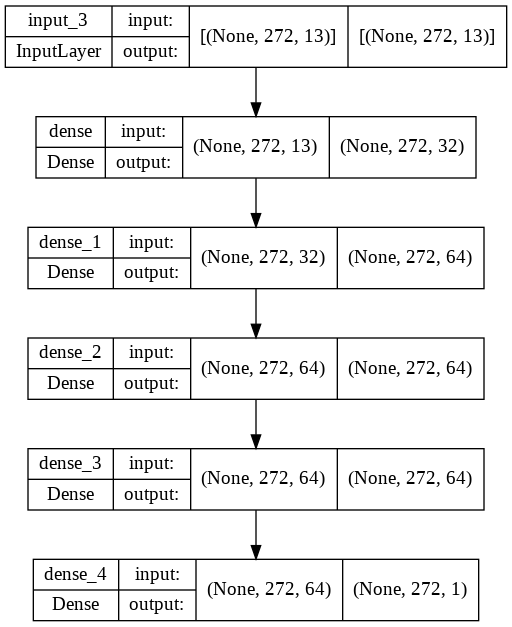

In [59]:
plot_model(model,show_shapes=True)

In [75]:
model.compile(loss='binary_crossentropy', metrics=[BinaryAccuracy()])

In [76]:
##tanítás "epoc" - látja az adathalmaz összes elemét egyszer
model.fit(x=x_train, y=y_train, epochs=50) #epoch-szám

Epoch 1/50
9/9 [==============================] - 1s 5ms/step - loss: 0.5829 - binary_accuracy: 0.7132
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4754 - binary_accuracy: 0.7390
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4001 - binary_accuracy: 0.7868
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.3409 - binary_accuracy: 0.8493
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.3053 - binary_accuracy: 0.8676
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2802 - binary_accuracy: 0.8897
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.2605 - binary_accuracy: 0.8971
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2511 - binary_accuracy: 0.9007
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2342 - binary_accuracy: 0.8971
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.

In [77]:
model.evaluate(x=x_test,y=y_test)

1/1 [==============================] - 0s 289ms/step - loss: 2.1249 - binary_accuracy: 0.6129


[2.1248669624328613, 0.6129032373428345]